# Random walking dead

**MOD510 - Project 4 G05**   
- Parthasarathi Jena
- Jing Hou
- Hodjat Moradi  

Date: Dec.10.2023

In [18]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython import display
#%matplotlib

## Learning objectives. 
By completing this project, the student will:  
• Learn how to escape a zombie outbreak by modeling the outbreak as a
random walk.  
• Use Monte Carlo techniques to quantify model uncertainty.  
• Investigate how model parameters in a continuum model can be predicted
from random walk.  
• Get insight into mechanisms important for spread of infectious diseases.  


## Abstract: 


## Introduction:


## Exercise 1: Random walk SZ-model

### Task 1.(The most comprehensive task!)  
• Write a class (or function) that can be used to conduct a single simulation of the random walk algorithm for the SZ-model.


Question 1: Assume that there is a single zombie initially, Z(0) = 1, what is the fate of the zombie and human population? (Figure 4 gives an indication of
what we expect as an answer.)

Question 2: If we instead started with Z(0) = 10, how does the time evolution change?

---------------------------

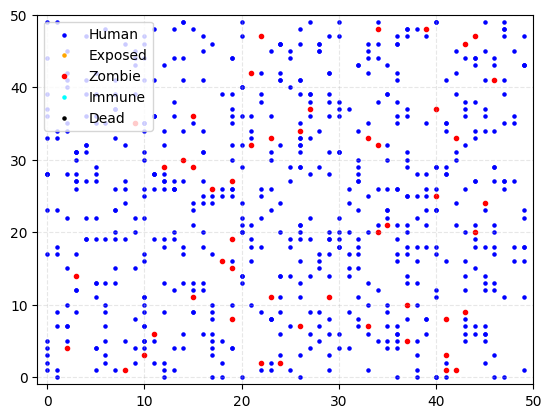

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

class RandomWalkZombieSimulator:
    def __init__(self, population_size=683, nx=50, ny=50, no_zombies=1,q=0.9):
        np.random.seed(2)
        self.N = population_size
        self.nx = nx
        self.ny = ny
        self.HUMAN = 0
        self.EXPOSED = 1
        self.ZOMBIE = 2
        self.IMMUNE = 3
        self.DEAD = 4
        self.no_zombies = no_zombies
        self.q = q
        self.Walkers = np.random.randint(0, [nx, ny], size=(self.N, 2))
        self.Walkers_old = np.copy(self.Walkers)
        self.State = np.repeat(self.HUMAN, self.N)
        self.State[:self.no_zombies] = self.ZOMBIE
        # direction west, east, north, south
        self.direction = np.array([[-1, 0], [1, 0], [0, 1], [0, -1]])

    def grid(self, ax):
        ax.set_xlim([-1, self.nx])
        ax.set_ylim([-1, self.ny])
        ax.grid(linestyle='--', alpha=0.3)

    def plot(self, ax):
        states_info = {
            self.HUMAN: {'color': 'blue', 'size': 5, 'label': 'Human'},
            self.EXPOSED: {'color': 'orange', 'size': 5, 'label': 'Exposed'},
            self.ZOMBIE: {'color': 'red', 'size': 9, 'label': 'Zombie'},
            self.IMMUNE: {'color': 'cyan', 'size': 5, 'label': 'Immune'},
            self.DEAD: {'color': 'black', 'size': 5, 'label': 'Dead'}
        }

        for state_value, info in states_info.items():
            state_coords = self.Walkers[self.State == state_value]
            ax.scatter(state_coords[:, 0], state_coords[:, 1], s=info['size'], c=info['color'], label=info['label'])

        self.grid(ax)
        ax.legend(loc='upper left')

    def move(self):
        x = np.random.randint(0, 4, size=self.N)
        step = self.direction[x]
        self.Walkers = self.Walkers + step

    def check_illegal_move(self):
        wrong_x = np.logical_or(self.Walkers[:, 0] < 0, self.Walkers[:, 0] >= self.nx)
        wrong_y = np.logical_or(self.Walkers[:, 1] < 0, self.Walkers[:, 1] >= self.ny)
        wrong_xy = np.logical_or(wrong_x, wrong_y)
        self.Walkers[wrong_xy] = self.Walkers_old[wrong_xy]
        self.Walkers_old = np.copy(self.Walkers)
    
    def infection_process(self):
        zombies = self.Walkers[self.State == self.ZOMBIE]
        humans = self.Walkers[self.State == self.HUMAN]

        for zombie in zombies:
            for human in humans:
                if np.all(np.abs(zombie - human) <= 1):
                    if np.random.rand() < self.q:
                        self.State[human] = self.ZOMBIE


# Function to update the animation frame
def update(frame):
    ax.clear()
    simulator.move()
    simulator.check_illegal_move()
    simulator.plot(ax)
    simulator.infection_process()


simulator = RandomWalkZombieSimulator(no_zombies=1)
fig, ax = plt.subplots()
Tstep = 100
ani = FuncAnimation(fig, update, frames=range(Tstep), interval=200, blit=False)
#ani.save('zombie_simulation.gif', writer=PillowWriter(fps=5))

plt.show()

-----------------------------
### **Reflections**:



### **Conclusion**: 




### **References**: 

[1] Compartmental models in epidemiology,  https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology  
[2]  
[3] Aksel Hiorth. Modeling and Computational Engineering. https://github.com/ahiorth/CompEngineering, 2022.  
[4] 